# Weighed phase unwrapping in pure Python
#### Author: Tobias A. de Jong

This notebook explores the weighed phase unwrapping algorithm as described in:

Ghiglia, Dennis C., and Louis A. Romero. 
__"Robust two-dimensional weighted and unweighted phase unwrapping that uses 
fast transforms and iterative methods."__ [JOSA A 11.1 (1994): 107-117.](https://doi.org/10.1364/JOSAA.11.000107)

The algorithm is replicated/reimplemented in pure Python / numpy / [scipy] in the accompanying `phase_unwrap.py`. We replicate Figures from the paper by Ghiglia and Romero using this new implementation.
In addition, the results are compared to an [existing unweighed phase-unwrapping algorithm in scikit-image](https://scikit-image.org/docs/dev/auto_examples/filters/plot_phase_unwrap.html).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from phase_unwrap import phase_unwrap, _wrapToPi
plt.style.use('dark_background')

# Pick your favorite modern colormap here, or leave on 'gray' for closed reproduction of the original figures
CMAP = 'gray'

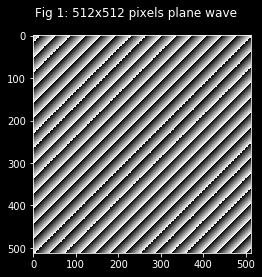

In [2]:
N = 512
xx,yy = np.meshgrid(np.arange(N), np.arange(N), indexing='ij')
plane_wave = np.angle(np.exp(1j*(yy+xx)/(4*np.sqrt(2))))
plt.imshow(plane_wave, cmap=CMAP)
plt.suptitle("Fig 1: 512x512 pixels plane wave");

Terminated after 1 iterations
Terminated after 1 iterations


/mnt/storage-linux/stack/Promotie/code/twistedbilayer/2020-03/weighed_phase_unwrap/phase_unwrap.py:93: RuntimeWarning: divide by zero encountered in true_divide
  dctPhi = dctn(rho) / scale


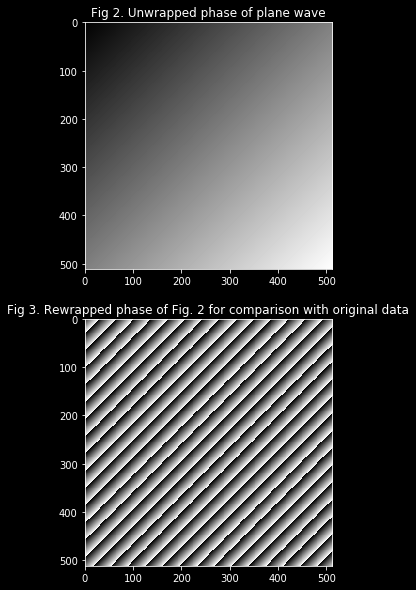

In [3]:
fig, axs = plt.subplots(nrows=2, figsize=[6,10])
axs[0].imshow(phase_unwrap(plane_wave), cmap=CMAP)
axs[0].set_title("Fig 2. Unwrapped phase of plane wave")
axs[1].imshow(_wrapToPi(phase_unwrap(plane_wave)), cmap=CMAP)
axs[1].set_title("Fig 3. Rewrapped phase of Fig. 2 for comparison with original data");

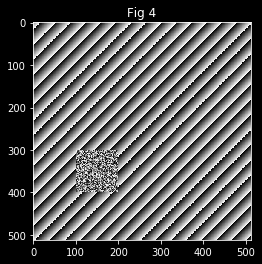

In [4]:
noise_plane_wave = plane_wave.copy()
noise_plane_wave[300:400,100:200] = np.random.uniform(-np.pi, np.pi, (100,100))
plt.imshow(noise_plane_wave, cmap=CMAP)
plt.title('Fig 4');

Terminated after 1 iterations
Terminated after 1 iterations


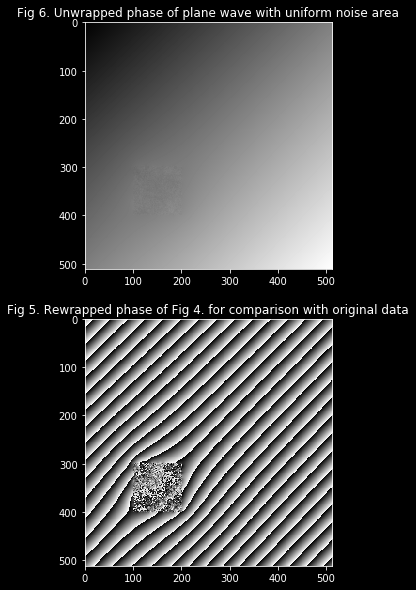

In [5]:
fig, axs = plt.subplots(nrows=2, figsize=[6,10])
axs[0].imshow(phase_unwrap(noise_plane_wave), cmap=CMAP)
axs[0].set_title("Fig 6. Unwrapped phase of plane wave with uniform noise area")
axs[1].imshow(_wrapToPi(phase_unwrap(noise_plane_wave)), cmap=CMAP)
axs[1].set_title("Fig 5. Rewrapped phase of Fig 4. for comparison with original data");

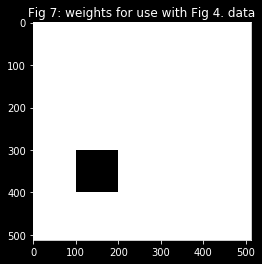

In [6]:
weights = np.ones_like(noise_plane_wave)
weights[300:400, 100:200] = 0
plt.imshow(weights, cmap=CMAP)
plt.title('Fig 7: weights for use with Fig 4. data');

Terminated after 1 iterations
Terminated after 2 iterations
Terminated after 3 iterations
Terminated after 15 iterations


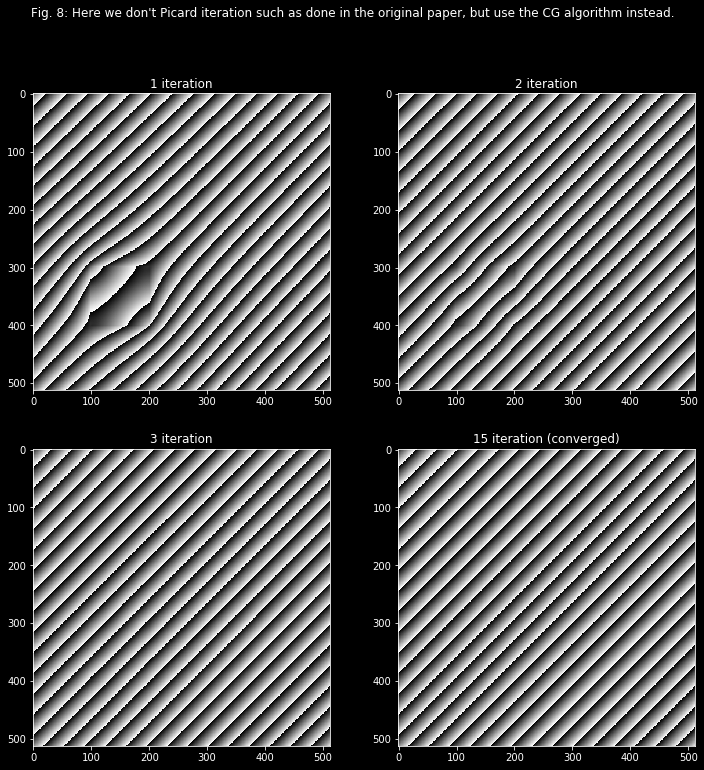

In [7]:
fig, axs = plt.subplots(2,2, figsize=[12,12])
axs = axs.flatten()
axs[0].imshow(_wrapToPi(phase_unwrap(plane_wave, weight=weights, kmax=1)), cmap=CMAP)
axs[0].set_title("1 iteration")
axs[1].imshow(_wrapToPi(phase_unwrap(plane_wave, weight=weights, kmax=2)), cmap=CMAP)
axs[1].set_title("2 iteration")
axs[2].imshow(_wrapToPi(phase_unwrap(plane_wave, weight=weights, kmax=3)), cmap=CMAP)
axs[2].set_title("3 iteration")
axs[3].imshow(_wrapToPi(phase_unwrap(plane_wave, weight=weights, kmax=100)), cmap=CMAP)
axs[3].set_title("15 iteration (converged)")
fig.suptitle("Fig. 8: Here we don't Picard iteration such as done in the original paper, "
          "but use the CG algorithm instead.");

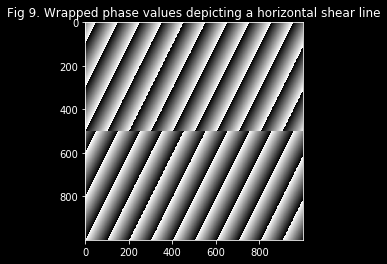

In [8]:
xx2,yy2 = np.meshgrid(np.arange(500), np.arange(1000), indexing='ij')
shear = np.concatenate([np.angle(np.exp(1j*(yy2/16 + xx2/32))), 
                        np.angle(np.exp(-1j*(yy2/16 + xx2/32)))])
plt.imshow(shear, cmap=CMAP)
plt.title("Fig 9. Wrapped phase values depicting a horizontal shear line");

Terminated after 1 iterations
Terminated after 1 iterations


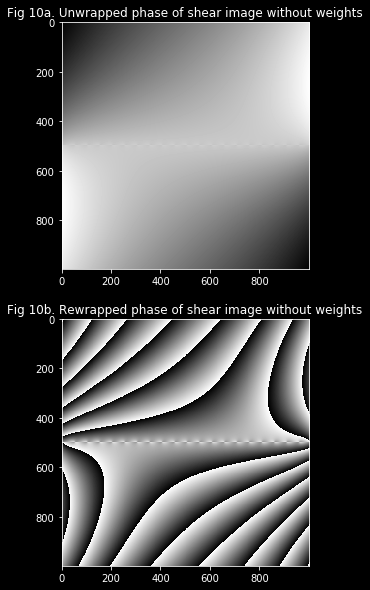

In [9]:
fig, axs = plt.subplots(nrows=2, figsize=[6,10])
axs[0].imshow(phase_unwrap(shear), cmap=CMAP)
axs[0].set_title("Fig 10a. Unwrapped phase of shear image without weights")
axs[1].imshow(_wrapToPi(phase_unwrap(shear)), cmap=CMAP)
axs[1].set_title("Fig 10b. Rewrapped phase of shear image without weights");

In [10]:
# We create a set of weights with a zero-weight line in the center
shearweight = np.ones_like(shear)
shearweight[shearweight.shape[0]//2, :] = 0.

/mnt/storage-linux/stack/Promotie/code/twistedbilayer/2020-03/weighed_phase_unwrap/phase_unwrap.py:93: RuntimeWarning: invalid value encountered in true_divide
  dctPhi = dctn(rho) / scale


Terminated after 10 iterations
Terminated after 20 iterations
Terminated after 20 iterations


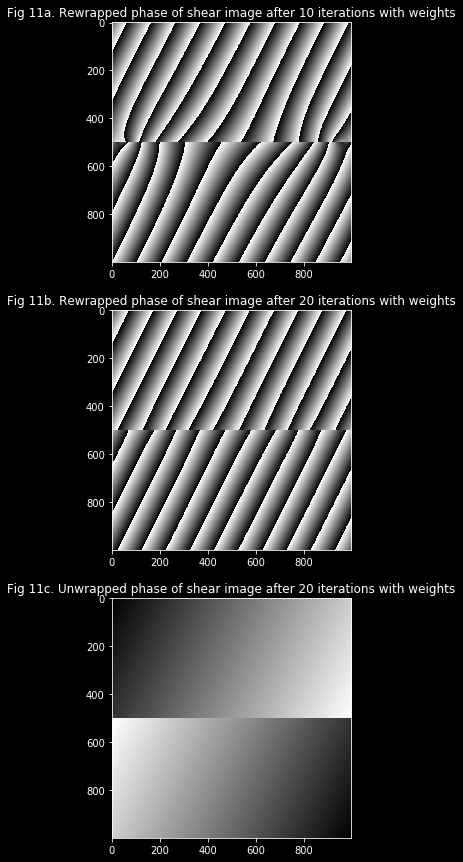

In [11]:
fig, axs = plt.subplots(nrows=3, figsize=[6,15])
axs[0].imshow(_wrapToPi(phase_unwrap(shear, weight=shearweight, kmax=10)), cmap=CMAP)
axs[0].set_title("Fig 11a. Rewrapped phase of shear image after 10 iterations with weights")
axs[1].imshow(_wrapToPi(phase_unwrap(shear, weight=shearweight, kmax=20)), cmap=CMAP)
axs[1].set_title("Fig 11b. Rewrapped phase of shear image after 20 iterations with weights")
axs[2].imshow(phase_unwrap(shear, weight=shearweight, kmax=20), cmap=CMAP);
axs[2].set_title("Fig 11c. Unwrapped phase of shear image after 20 iterations with weights");
# Note: This implementation actually only converges after 75 iterations, 
# but has at that point converged to double precision

# Comparison to "Fast two-dimensional phase-unwrapping algorithm based on sorting by reliability following a noncontinuous path" as implemented by scikit image

Scikit image implements a different, unweighed algorithm, as published in:

Miguel Arevallilo Herraez, David R. Burton, Michael J. Lalor, and Munther A. Gdeisat, “Fast two-dimensional phase-unwrapping algorithm based on sorting by reliability following a noncontinuous path”, [Journal Applied Optics, Vol. 41, No. 35, pp. 7437, 2002](https://doi.org/10.1364/AO.41.007437)

This more modern algorithm takes advantage of estimating a reliability from local gradients, which, as we will see, partially negates the need for weights and only shifts areas by multiples of $2 \pi$.

We start with adapting the [scikit-image example](https://scikit-image.org/docs/dev/auto_examples/filters/plot_phase_unwrap.html) to compare the results of both algorithms on the standard image of the cat Chelsea.

/mnt/storage-linux/stack/Promotie/code/twistedbilayer/2020-03/weighed_phase_unwrap/phase_unwrap.py:93: RuntimeWarning: divide by zero encountered in true_divide
  dctPhi = dctn(rho) / scale
/mnt/storage-linux/stack/Promotie/code/twistedbilayer/2020-03/weighed_phase_unwrap/phase_unwrap.py:93: RuntimeWarning: invalid value encountered in true_divide
  dctPhi = dctn(rho) / scale


Terminated after 22 iterations


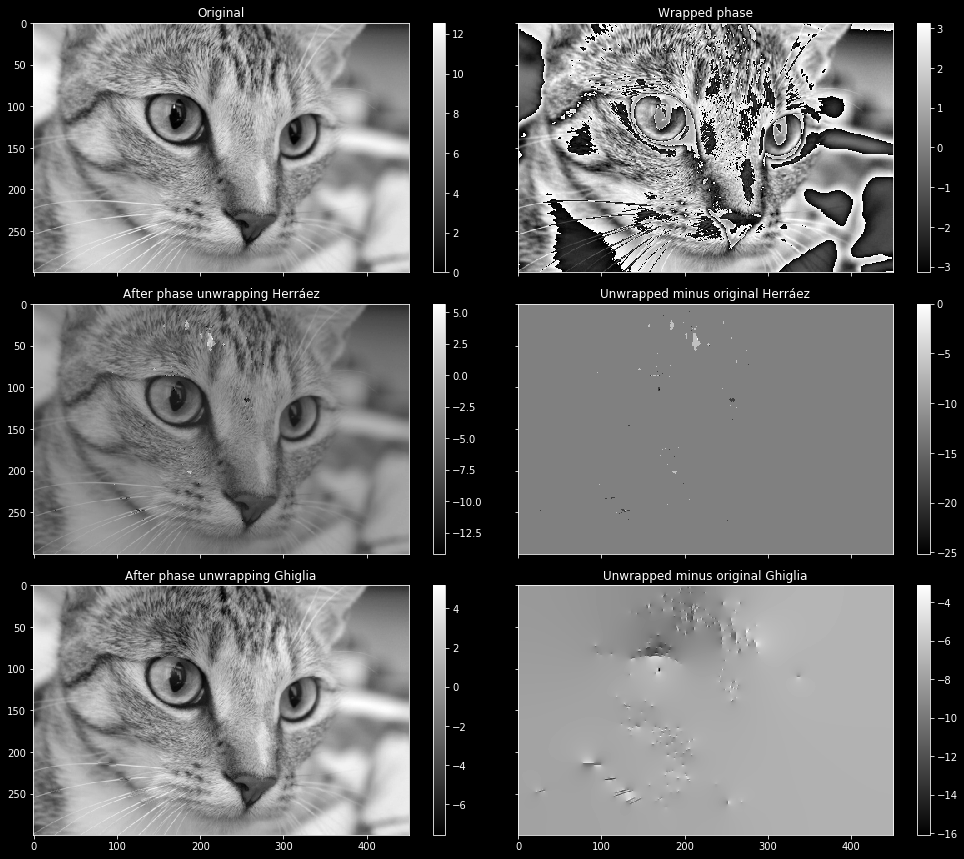

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, img_as_float, color, exposure
from skimage.restoration import unwrap_phase


# Load an image as a floating-point grayscale
image = color.rgb2gray(img_as_float(data.chelsea()))
# Scale the image to [0, 4*pi]
image = exposure.rescale_intensity(image, out_range=(0, 4 * np.pi))
# Create a phase-wrapped image in the interval [-pi, pi)
image_wrapped = np.angle(np.exp(1j * image))
# Perform phase unwrapping
image_unwrapped = unwrap_phase(image_wrapped)
image_unwrapped2 = phase_unwrap(image_wrapped)

fig, ax = plt.subplots(3, 2, sharex=True, sharey=True, figsize=[14,12])
ax = ax.ravel()

fig.colorbar(ax[0].imshow(image, cmap=CMAP, vmin=0, vmax=4 * np.pi), ax=ax[0])
ax[0].set_title('Original')

fig.colorbar(ax[1].imshow(image_wrapped, cmap=CMAP, vmin=-np.pi, vmax=np.pi),
             ax=ax[1])
ax[1].set_title('Wrapped phase')

fig.colorbar(ax[2].imshow(image_unwrapped, cmap=CMAP), ax=ax[2])
ax[2].set_title('After phase unwrapping Herráez')

fig.colorbar(ax[3].imshow(image_unwrapped - image, cmap=CMAP), ax=ax[3])
ax[3].set_title('Unwrapped minus original Herráez')

fig.colorbar(ax[4].imshow(image_unwrapped2, cmap=CMAP), ax=ax[4])
ax[4].set_title('After phase unwrapping Ghiglia')

fig.colorbar(ax[5].imshow(image_unwrapped2 - image, cmap=CMAP), ax=ax[5])
ax[5].set_title('Unwrapped minus original Ghiglia')
plt.tight_layout();

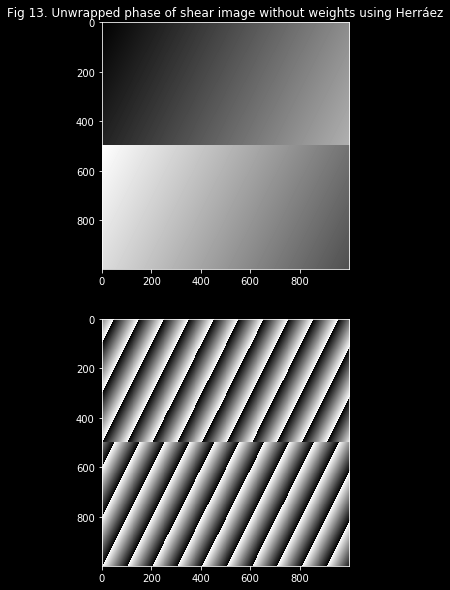

In [13]:
fig, axs = plt.subplots(nrows=2, figsize=[6,10])
axs[0].imshow(unwrap_phase(shear), cmap=CMAP)
axs[0].set_title("Fig 13. Unwrapped phase of shear image without weights using Herráez")
axs[1].imshow(_wrapToPi(unwrap_phase(shear)), cmap=CMAP);

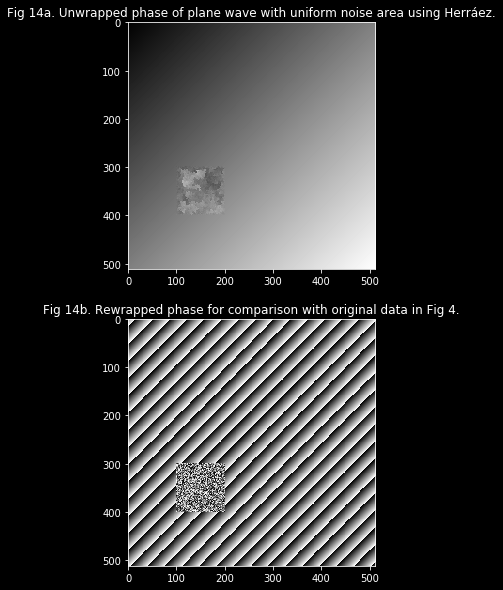

In [14]:
fig, axs = plt.subplots(nrows=2, figsize=[6,10])
axs[0].imshow(unwrap_phase(noise_plane_wave), cmap=CMAP)
axs[0].set_title("Fig 14a. Unwrapped phase of plane wave with uniform noise area using Herráez.")
axs[1].imshow(_wrapToPi(unwrap_phase(noise_plane_wave)), cmap=CMAP)
axs[1].set_title("Fig 14b. Rewrapped phase for comparison with original data in Fig 4.");

# Conclusion
We were able to reproduce the results of Ghiglia et al. using a pure Python implementation. Leveraging the [scipy](https://doi.org/10.1038/s41592-019-0686-2) wrapping of FFTPACK for the Discrete Cosine Transforms, the implementation is actually quite performant on 2020 era hardware. 

When comparing to the algorithm of Herráez et al., it becomes however clear that part of the use cases originally presented by Ghiglia et al. are better and easier handled by the more modern algorithm: discrete shear boundaries are handled by the reliability of the Herráez et al. algorithm without the need for weights as an input. 
The weighted algorithm remains useful in the case of noisy wrapped phase data with a natural source of weights, e.g. for the phase unwrapping of noisy complex data, where the amplitude provides a natural weight and noise introduces false phase jumps.